In [1]:

%load_ext autoreload
%autoreload 2
import bnl

## Tests for checking metrics are working

In [3]:
def simple_hierarchy():
    # Level 0 - coarsest segmentation
    level0_itvls = [(0.0, 10.0), (10.0, 20.0)]
    level0_labels = ["A", "B"]

    # Level 1 - finer segmentation
    level1_itvls = [(0.0, 6.0), (6.0, 10.0), (10.0, 16.0), (16.0, 20.0)]
    level1_labels = ["A1", "A2", "B1", "B2"]

    # Level 2 - finest segmentation
    level2_itvls = [
        (0.0, 3),
        (3, 5.0),
        (5.0, 7.5),
        (7.5, 10.0),
        (10.0, 13),
        (13, 15.0),
        (15.0, 17.5),
        (17.5, 20.0),
    ]
    level2_labels = ["A1a", "A1b", "A2a", "A2b", "B1a", "B1b", "B2a", "B2b"]

    hier_itvls = [level0_itvls, level1_itvls, level2_itvls]
    hier_labels = [level0_labels, level1_labels, level2_labels]

    return bnl.H(hier_itvls, hier_labels)



In [4]:
h = simple_hierarchy()

(<Figure size 500x170 with 3 Axes>,
 array([<Axes: >, <Axes: >, <Axes: xlabel='Time (s)'>], dtype=object))

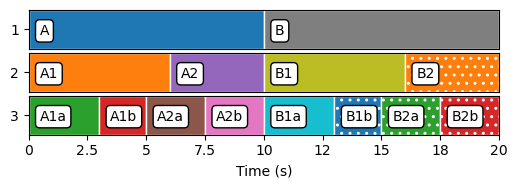

In [5]:
h.plot()

In [7]:
s1 = h.levels[1]
s2 = h.levels[2]
bnl.fmtr.entropy(s1.itvls, s1.labels)

1.3661588475692017

In [8]:
h1 = bnl.levels2H(h.levels[1:])
h2 = bnl.levels2H([h.levels[0]])

In [18]:
import mir_eval
c = bnl.fmtr.lmeasure(h1.itvls, h1.labels, h2.itvls, h2.labels)
d = mir_eval.hierarchy.lmeasure(
    h1.itvls,
    h1.labels,
    h2.itvls,
    h2.labels
)
c, d

((0.55, 0.63448057332204, 0.5892275874958476),
 (0.544941777533307, 0.6354240901584928, 0.5867149206128454))

In [19]:
import mir_eval
a = bnl.fmtr.pairwise(s1.itvls, s1.labels, s2.itvls, s2.labels)
b = mir_eval.segment.pairwise(
    s1.itvls, s1.labels, s2.itvls, s2.labels
)  # beta=1.0 is the default value

a, b

((0.8823529411764706, 0.4326923076923077, 0.5806451612903226),
 (0.8775510204081632, 0.4215686274509804, 0.5695364238410596))

In [20]:
import mir_eval
a = bnl.fmtr.vmeasure(s1.itvls, s1.labels, s2.itvls, s2.labels)
b = mir_eval.segment.vmeasure(
    s1.itvls, s1.labels, s2.itvls, s2.labels
)  # beta=1.0 is the default value

a, b

((0.5788736377909488, 0.8768423473948979, 0.697362568757996),
 (0.5788736377909488, 0.8768423473948981, 0.6973625687579961))

## Let's plot!

- Figure 1: how framesize affect the triplet metrics
- Figure 2: how continuous compares with 0.5: scatter plot


517-0
517-1


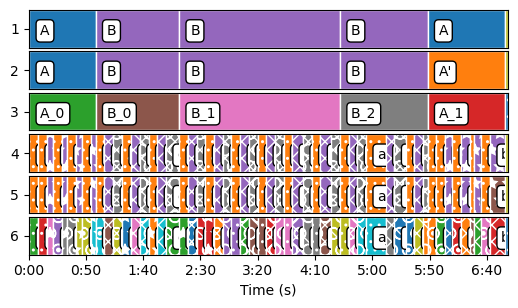

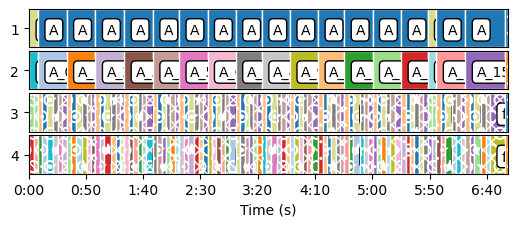

In [2]:
import random
tids = bnl.fio.salami_tids()
tid = random.choice(tids)
salami_hiers = bnl.fio.salami_ref_hiers(tid=tid)
while len(salami_hiers) < 2:
    tid = random.choice(tids)
    salami_hiers = bnl.fio.salami_ref_hiers(tid=tid)

hiers = {'-'.join([str(tid), str(i)]): h for i, h in enumerate(salami_hiers)}

for tid, h in hiers.items():
    print(tid)
    h.expand(format='slm', always_include=False).plot();

## Comparing Mir_eval implementation and my implementation


### Ok. now I need to do this over all tracks that have 2 annotations and record all the times and results, for several configs


In [5]:
%load_ext autoreload
%autoreload 2
import bnl
from bnl import metrics
import os, pqdm
import xarray as xr, numpy as np
from pqdm.processes import pqdm
from glob import glob
from tqdm import tqdm

In [7]:
import bnl
tids = bnl.fio.salami_tids()
o =  bnl.prf.time_salami_track(tids[0])

In [8]:
import importlib
import bnl
importlib.reload(bnl.prf)

<module 'bnl.profiling' from '/Users/tomxi/code/bnl/bnl/profiling.py'>

In [2]:
from bnl import fio, mtr, prf
from pqdm.processes import pqdm

n_jobs = 9
tids = fio.salami_tids()
pqdm(tids, prf.time_salami_track, n_jobs=n_jobs);

QUEUEING TASKS | :   0%|          | 0/1359 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1359 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1359 [00:00<?, ?it/s]

In [14]:
from bnl import fio, mtr, prf
import bnl
import importlib
importlib.reload(bnl)
importlib.reload(bnl.prf)
from pqdm.processes import pqdm

n_jobs = 7
tids = fio.salami_tids()
results = pqdm(tids, prf.time_single_anno, n_jobs=n_jobs)

QUEUEING TASKS | :   0%|          | 0/1359 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1359 [00:00<?, ?it/s]

Already timed 101.
Already timed 1004.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1015 and saved to ./single_anno/1015.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1005 and saved to ./single_anno/1005.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1012 and saved to ./single_anno/1012.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1018 and saved to ./single_anno/1018.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1020 and saved to ./single_anno/1020.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1014 and saved to ./single_anno/1014.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1024 and saved to ./single_anno/1024.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1011 and saved to ./single_anno/1011.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1047 and saved to ./single_anno/1047.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1048 and saved to ./single_anno/1048.nc.
Timed 1042 and saved to ./single_anno/1042.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1046 and saved to ./single_anno/1046.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1013 and saved to ./single_anno/1013.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1067 and saved to ./single_anno/1067.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1060 and saved to ./single_anno/1060.nc.
Timed 1056 and saved to ./single_anno/1056.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1069 and saved to ./single_anno/1069.nc.
Timed 1061 and saved to ./single_anno/1061.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1070 and saved to ./single_anno/1070.nc.
Timed 1075 and saved to ./single_anno/1075.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1068 and saved to ./single_anno/1068.nc.
Already timed 108.
Timed 1053 and saved to ./single_anno/1053.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1074 and saved to ./single_anno/1074.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1080 and saved to ./single_anno/1080.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1076 and saved to ./single_anno/1076.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1062 and saved to ./single_anno/1062.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1096 and saved to ./single_anno/1096.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1079 and saved to ./single_anno/1079.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1072 and saved to ./single_anno/1072.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1095 and saved to ./single_anno/1095.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1084 and saved to ./single_anno/1084.nc.
Timed 1085 and saved to ./single_anno/1085.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1098 and saved to ./single_anno/1098.nc.
Timed 1102 and saved to ./single_anno/1102.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1101 and saved to ./single_anno/1101.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1108 and saved to ./single_anno/1108.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1103 and saved to ./single_anno/1103.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1088 and saved to ./single_anno/1088.nc.
Already timed 112.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1109 and saved to ./single_anno/1109.nc.
Timed 1116 and saved to ./single_anno/1116.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1107 and saved to ./single_anno/1107.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1117 and saved to ./single_anno/1117.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1125 and saved to ./single_anno/1125.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1123 and saved to ./single_anno/1123.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1132 and saved to ./single_anno/1132.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1124 and saved to ./single_anno/1124.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1136 and saved to ./single_anno/1136.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1135 and saved to ./single_anno/1135.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1130 and saved to ./single_anno/1130.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1144 and saved to ./single_anno/1144.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1131 and saved to ./single_anno/1131.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1112 and saved to ./single_anno/1112.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1154 and saved to ./single_anno/1154.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1157 and saved to ./single_anno/1157.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1138 and saved to ./single_anno/1138.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/min

Timed 1104 and saved to ./single_anno/1104.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1159 and saved to ./single_anno/1159.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1160 and saved to ./single_anno/1160.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 10
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 11
  warnings.warn(


Timed 1158 and saved to ./single_anno/1158.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1152 and saved to ./single_anno/1152.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1165 and saved to ./single_anno/1165.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1163 and saved to ./single_anno/1163.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1151 and saved to ./single_anno/1151.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1172 and saved to ./single_anno/1172.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1181 and saved to ./single_anno/1181.nc.
Timed 1180 and saved to ./single_anno/1180.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1164 and saved to ./single_anno/1164.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1182 and saved to ./single_anno/1182.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1186 and saved to ./single_anno/1186.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1187 and saved to ./single_anno/1187.nc.
Timed 1168 and saved to ./single_anno/1168.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1191 and saved to ./single_anno/1191.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1196 and saved to ./single_anno/1196.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1173 and saved to ./single_anno/1173.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1192 and saved to ./single_anno/1192.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1188 and saved to ./single_anno/1188.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1141 and saved to ./single_anno/1141.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1207 and saved to ./single_anno/1207.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1200 and saved to ./single_anno/1200.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1210 and saved to ./single_anno/1210.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1197 and saved to ./single_anno/1197.nc.
Timed 1179 and saved to ./single_anno/1179.nc.
Already timed 122.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1208 and saved to ./single_anno/1208.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1216 and saved to ./single_anno/1216.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1220 and saved to ./single_anno/1220.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1214 and saved to ./single_anno/1214.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1213 and saved to ./single_anno/1213.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1219 and saved to ./single_anno/1219.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1215 and saved to ./single_anno/1215.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1235 and saved to ./single_anno/1235.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1237 and saved to ./single_anno/1237.nc.
Already timed 124.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1221 and saved to ./single_anno/1221.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1228 and saved to ./single_anno/1228.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1224 and saved to ./single_anno/1224.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1229 and saved to ./single_anno/1229.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1238 and saved to ./single_anno/1238.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1236 and saved to ./single_anno/1236.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1244 and saved to ./single_anno/1244.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1256 and saved to ./single_anno/1256.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1242 and saved to ./single_anno/1242.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1248 and saved to ./single_anno/1248.nc.
Timed 1252 and saved to ./single_anno/1252.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1247 and saved to ./single_anno/1247.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1253 and saved to ./single_anno/1253.nc.
Already timed 127.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1258 and saved to ./single_anno/1258.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1243 and saved to ./single_anno/1243.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1270 and saved to ./single_anno/1270.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1271 and saved to ./single_anno/1271.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1272 and saved to ./single_anno/1272.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1266 and saved to ./single_anno/1266.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1263 and saved to ./single_anno/1263.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1275 and saved to ./single_anno/1275.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1269 and saved to ./single_anno/1269.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1291 and saved to ./single_anno/1291.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1285 and saved to ./single_anno/1285.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1284 and saved to ./single_anno/1284.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1264 and saved to ./single_anno/1264.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1280 and saved to ./single_anno/1280.nc.
Timed 1293 and saved to ./single_anno/1293.nc.
Timed 1294 and saved to ./single_anno/1294.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1277 and saved to ./single_anno/1277.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1303 and saved to ./single_anno/1303.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1298 and saved to ./single_anno/1298.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1276 and saved to ./single_anno/1276.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1299 and saved to ./single_anno/1299.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1304 and saved to ./single_anno/1304.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1308 and saved to ./single_anno/1308.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1319 and saved to ./single_anno/1319.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1326 and saved to ./single_anno/1326.nc.
Already timed 1327.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1322 and saved to ./single_anno/1322.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1325 and saved to ./single_anno/1325.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1292 and saved to ./single_anno/1292.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1328 and saved to ./single_anno/1328.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1332 and saved to ./single_anno/1332.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1300 and saved to ./single_anno/1300.nc.
Timed 1331 and saved to ./single_anno/1331.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1340 and saved to ./single_anno/1340.nc.
Timed 1333 and saved to ./single_anno/1333.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1347 and saved to ./single_anno/1347.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1312 and saved to ./single_anno/1312.nc.
Timed 1309 and saved to ./single_anno/1309.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1348 and saved to ./single_anno/1348.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1359 and saved to ./single_anno/1359.nc.
Already timed 136.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1349 and saved to ./single_anno/1349.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1336 and saved to ./single_anno/1336.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1356 and saved to ./single_anno/1356.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1365 and saved to ./single_anno/1365.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1360 and saved to ./single_anno/1360.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1376 and saved to ./single_anno/1376.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1355 and saved to ./single_anno/1355.nc.
Timed 1354 and saved to ./single_anno/1354.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1341 and saved to ./single_anno/1341.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1382 and saved to ./single_anno/1382.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1375 and saved to ./single_anno/1375.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1364 and saved to ./single_anno/1364.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1368 and saved to ./single_anno/1368.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1378 and saved to ./single_anno/1378.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1389 and saved to ./single_anno/1389.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1384 and saved to ./single_anno/1384.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1396 and saved to ./single_anno/1396.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1387 and saved to ./single_anno/1387.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1403 and saved to ./single_anno/1403.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1397 and saved to ./single_anno/1397.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1404 and saved to ./single_anno/1404.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1405 and saved to ./single_anno/1405.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1406 and saved to ./single_anno/1406.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1381 and saved to ./single_anno/1381.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1383 and saved to ./single_anno/1383.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1388 and saved to ./single_anno/1388.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1412 and saved to ./single_anno/1412.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1434 and saved to ./single_anno/1434.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1424 and saved to ./single_anno/1424.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1444 and saved to ./single_anno/1444.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1445 and saved to ./single_anno/1445.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1443 and saved to ./single_anno/1443.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1439 and saved to ./single_anno/1439.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1416 and saved to ./single_anno/1416.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/min

Timed 1448 and saved to ./single_anno/1448.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1459 and saved to ./single_anno/1459.nc.
Timed 1452 and saved to ./single_anno/1452.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 10
  warnings.warn(
/Users/tomxi/mi

Timed 1432 and saved to ./single_anno/1432.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 141 and saved to ./single_anno/141.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1468 and saved to ./single_anno/1468.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1467 and saved to ./single_anno/1467.nc.
Already timed 148.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1461 and saved to ./single_anno/1461.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1477 and saved to ./single_anno/1477.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1421 and saved to ./single_anno/1421.nc.
Already timed 1499.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1462 and saved to ./single_anno/1462.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1472 and saved to ./single_anno/1472.nc.
Already timed 1503.
Already timed 1504.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1453 and saved to ./single_anno/1453.nc.
Already timed 1507.
Already timed 1508.
Already timed 1509.
Already timed 1510.
Already timed 1511.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1488 and saved to ./single_anno/1488.nc.
Already timed 1514.
Already timed 1515.
Already timed 1516.
Already timed 1517.
Already timed 1518.
Already timed 1519.
Already timed 1520.
Already timed 1522.
Already timed 1523.
Already timed 1524.
Already timed 1525.
Already timed 1526.
Already timed 1527.
Already timed 1528.
Already timed 1530.
Already timed 1531.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1494 and saved to ./single_anno/1494.nc.
Already timed 1533.
Already timed 1534.
Already timed 1535.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1532 and saved to ./single_anno/1532.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1536 and saved to ./single_anno/1536.nc.
Already timed 1539.
Already timed 1540.
Already timed 1541.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1495 and saved to ./single_anno/1495.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1512 and saved to ./single_anno/1512.nc.
Already timed 1544.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1538 and saved to ./single_anno/1538.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1546 and saved to ./single_anno/1546.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1543 and saved to ./single_anno/1543.nc.
Already timed 1549.
Already timed 1550.
Already timed 1551.
Already timed 1552.
Already timed 1554.
Already timed 1555.
Timed 1542 and saved to ./single_anno/1542.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1548 and saved to ./single_anno/1548.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1506 and saved to ./single_anno/1506.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1556 and saved to ./single_anno/1556.nc.
Already timed 156.
Already timed 1560.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1547 and saved to ./single_anno/1547.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1557 and saved to ./single_anno/1557.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1559 and saved to ./single_anno/1559.nc.
Already timed 1565.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1558 and saved to ./single_anno/1558.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1563 and saved to ./single_anno/1563.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1501 and saved to ./single_anno/1501.nc.
Already timed 1570.
Timed 1562 and saved to ./single_anno/1562.nc.
Already timed 1572.
Already timed 1571.
Timed 1502 and saved to ./single_anno/1502.nc.
Already timed 1575.
Already timed 1576.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1567 and saved to ./single_anno/1567.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1564 and saved to ./single_anno/1564.nc.
Already timed 1580.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1573 and saved to ./single_anno/1573.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1574 and saved to ./single_anno/1574.nc.
Timed 1566 and saved to ./single_anno/1566.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1578 and saved to ./single_anno/1578.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1579 and saved to ./single_anno/1579.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1581 and saved to ./single_anno/1581.nc.
Already timed 1588.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1582 and saved to ./single_anno/1582.nc.
Already timed 1590.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1584 and saved to ./single_anno/1584.nc.
Timed 1586 and saved to ./single_anno/1586.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1587 and saved to ./single_anno/1587.nc.
Already timed 1595.
Timed 1589 and saved to ./single_anno/1589.nc.
Already timed 1597.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1591 and saved to ./single_anno/1591.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1594 and saved to ./single_anno/1594.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1583 and saved to ./single_anno/1583.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1592 and saved to ./single_anno/1592.nc.
Timed 1596 and saved to ./single_anno/1596.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1600 and saved to ./single_anno/1600.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1605 and saved to ./single_anno/1605.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1606 and saved to ./single_anno/1606.nc.
Timed 1598 and saved to ./single_anno/1598.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1603 and saved to ./single_anno/1603.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1602 and saved to ./single_anno/1602.nc.
Timed 1604 and saved to ./single_anno/1604.nc.
Already timed 1612.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/min

Timed 1568 and saved to ./single_anno/1568.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1613 and saved to ./single_anno/1613.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1610 and saved to ./single_anno/1610.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1611 and saved to ./single_anno/1611.nc.
Timed 1614 and saved to ./single_anno/1614.nc.
Already timed 1620.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1616 and saved to ./single_anno/1616.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1615 and saved to ./single_anno/1615.nc.
Timed 1607 and saved to ./single_anno/1607.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1618 and saved to ./single_anno/1618.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1619 and saved to ./single_anno/1619.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1608 and saved to ./single_anno/1608.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1621 and saved to ./single_anno/1621.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1622 and saved to ./single_anno/1622.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1627 and saved to ./single_anno/1627.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/min

Timed 1631 and saved to ./single_anno/1631.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1623 and saved to ./single_anno/1623.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1630 and saved to ./single_anno/1630.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1628 and saved to ./single_anno/1628.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1634 and saved to ./single_anno/1634.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1624 and saved to ./single_anno/1624.nc.
Timed 1635 and saved to ./single_anno/1635.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1626 and saved to ./single_anno/1626.nc.
Already timed 164.
Timed 1629 and saved to ./single_anno/1629.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1638 and saved to ./single_anno/1638.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1636 and saved to ./single_anno/1636.nc.
Timed 1637 and saved to ./single_anno/1637.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1639 and saved to ./single_anno/1639.nc.
Timed 1640 and saved to ./single_anno/1640.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1632 and saved to ./single_anno/1632.nc.
Timed 1643 and saved to ./single_anno/1643.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1642 and saved to ./single_anno/1642.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 1648 and saved to ./single_anno/1648.nc.
Timed 1646 and saved to ./single_anno/1646.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1645 and saved to ./single_anno/1645.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1644 and saved to ./single_anno/1644.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 171 and saved to ./single_anno/171.nc.
Already timed 176.
Timed 1653 and saved to ./single_anno/1653.nc.
Already timed 184.
Already timed 186.
Already timed 192.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1647 and saved to ./single_anno/1647.nc.
Already timed 204.
Already timed 206.
Already timed 212.
Already timed 213.
Already timed 231.
Already timed 232.
Already timed 234.
Already timed 239.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1654 and saved to ./single_anno/1654.nc.
Already timed 243.
Already timed 247.
Already timed 248.
Already timed 252.
Timed 1650 and saved to ./single_anno/1650.nc.
Already timed 264.
Already timed 268.
Already timed 269.
Already timed 271.
Timed 240 and saved to ./single_anno/240.nc.
Already timed 276.
Already timed 277.
Already timed 288.
Already timed 296.
Already timed 299.
Timed 1655 and saved to ./single_anno/1655.nc.
Already timed 304.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 10
  warnings.warn(
/Users/tomxi/mi

Already timed 324.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 306 and saved to ./single_anno/306.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 200 and saved to ./single_anno/200.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/min

Timed 339 and saved to ./single_anno/339.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 354 and saved to ./single_anno/354.nc.
Already timed 356.
Already timed 359.
Timed 1652 and saved to ./single_anno/1652.nc.
Already timed 387.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 390 and saved to ./single_anno/390.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 376 and saved to ./single_anno/376.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 399 and saved to ./single_anno/399.nc.
Already timed 432.
Already timed 454.
Already timed 468.
Timed 342 and saved to ./single_anno/342.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Already timed 506.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 349 and saved to ./single_anno/349.nc.
Already timed 548.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 55 and saved to ./single_anno/55.nc.
Already timed 56.
Timed 542 and saved to ./single_anno/542.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 629 and saved to ./single_anno/629.nc.
Already timed 632.
Already timed 64.
Already timed 648.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 476 and saved to ./single_anno/476.nc.
Already timed 664.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 11
  warnings.warn(


Timed 679 and saved to ./single_anno/679.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 654 and saved to ./single_anno/654.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 693 and saved to ./single_anno/693.nc.
Already timed 699.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 423 and saved to ./single_anno/423.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 709 and saved to ./single_anno/709.nc.
Timed 710 and saved to ./single_anno/710.nc.
Timed 711 and saved to ./single_anno/711.nc.
Already timed 712.
Already timed 714.
Timed 189 and saved to ./single_anno/189.nc.
Already timed 716.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 717 and saved to ./single_anno/717.nc.
Timed 718 and saved to ./single_anno/718.nc.
Already timed 719.
Already timed 72.
Timed 720 and saved to ./single_anno/720.nc.
Already timed 722.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 715 and saved to ./single_anno/715.nc.
Timed 724 and saved to ./single_anno/724.nc.
Already timed 725.
Timed 723 and saved to ./single_anno/723.nc.
Already timed 744.
Already timed 743.
Already timed 746.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 75 and saved to ./single_anno/75.nc.
Already timed 756.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 771 and saved to ./single_anno/771.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 752 and saved to ./single_anno/752.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 293 and saved to ./single_anno/293.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 774 and saved to ./single_anno/774.nc.
Already timed 786.
Timed 772 and saved to ./single_anno/772.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 808 and saved to ./single_anno/808.nc.
Already timed 836.
Already timed 848.
Already timed 856.
Already timed 863.
Already timed 864.
Already timed 868.
Already timed 878.
Already timed 884.
Already timed 885.
Already timed 887.
Already timed 888.
Already timed 890.
Already timed 892.
Already timed 896.
Already timed 898.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 784 and saved to ./single_anno/784.nc.
Already timed 903.
Already timed 912.
Already timed 914.
Already timed 92.
Already timed 924.
Already timed 926.
Already timed 931.
Already timed 932.
Already timed 938.
Already timed 94.
Already timed 943.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 812 and saved to ./single_anno/812.nc.
Already timed 948.
Already timed 952.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 944 and saved to ./single_anno/944.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 958 and saved to ./single_anno/958.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 964 and saved to ./single_anno/964.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 968 and saved to ./single_anno/968.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 962 and saved to ./single_anno/962.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 984 and saved to ./single_anno/984.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 9
  warnings.warn(
/Users/tomxi/min

Timed 989 and saved to ./single_anno/989.nc.
Already timed 992.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 63 and saved to ./single_anno/63.nc.


/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 8
  warnings.warn(
/Users/tomxi/min

Timed 996 and saved to ./single_anno/996.nc.
Timed 986 and saved to ./single_anno/986.nc.
Timed 90 and saved to ./single_anno/90.nc.
Timed 995 and saved to ./single_anno/995.nc.
Timed 680 and saved to ./single_anno/680.nc.
Timed 70 and saved to ./single_anno/70.nc.
Timed 261 and saved to ./single_anno/261.nc.


COLLECTING RESULTS | :   0%|          | 0/1359 [00:00<?, ?it/s]

In [13]:
prf.time_single_anno(tids[5])

/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 2
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 3
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 4
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 5
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 6
  warnings.warn(
/Users/tomxi/miniforge3/envs/py39/lib/python3.9/site-packages/mir_eval/hierarchy.py:460: UserWarning: Segment hierarchy is inconsistent at level 7
  warnings.warn(
/Users/tomxi/min

Timed 1004 and saved to ./single_anno/1004.nc.


'./single_anno/1004.nc'

In [10]:
results

[None,
 None,
 None,
 None,
 None,
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 None,
 None,
 None,
 './single_anno/101.nc',
 None,
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 None,
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 None,
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 None,
 None,
 None,
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 AttributeError("'numpy.ndarray' object has no attribute 'append'"),
 None,
 None,
 None,
 AttributeErr

In [4]:
from bnl import fio, mtr, prf

Type:        module
String form: <module 'bnl.fileio' from '/Users/tomxi/code/bnl/bnl/fileio.py'>
File:        ~/code/bnl/bnl/fileio.py
Docstring:   <no docstring>

In [20]:
fio.salami_ref_hiers(20)

{'4': <bnl.core.H at 0x3178582b0>, '6': <bnl.core.H at 0x317858910>}

In [ ]:
# Get the duration of all reference annotations
dur_dict = {}
for tid in fio.salami_tids():
    refs = fio.salami_ref_hiers(tid)
    if len(refs) == 2:
        dur = list(refs.values())[0].T
        dur_dict[tid] = dur


In [26]:
# Save it to a file
import json
with open('salami_durations.json', 'w') as f:
    json.dump(dur_dict, f)
# Load the file
with open('salami_durations.json', 'r') as f:
    dur_dict = json.load(f)

In [27]:
with open('salami_durations.json', 'r') as f:
    dur_dict = json.load(f)

In [29]:
from glob import glob
from tqdm import tqdm
import os
import xarray as xr
## Time to collect
track_results_fpaths = glob('./new_faster_compare/*.nc')

das = []
for fp in tqdm(track_results_fpaths):
    tid = os.path.basename(fp).split('.')[0]
    # Load the data array and assign the tid as a coordinate
    da = xr.open_dataarray(fp)
    das.append(da)

# Concatenate all the data arrays along the 'tid' dimension
final_da = xr.concat(das, dim='tid')


100%|██████████| 883/883 [00:01<00:00, 789.34it/s]


In [30]:
#  Save the final data array to a NetCDF file
final_da.to_netcdf('./new_faster_compare.nc')

### Alright, I can load from saved data now. Now let's do scatter plot to see how they differ

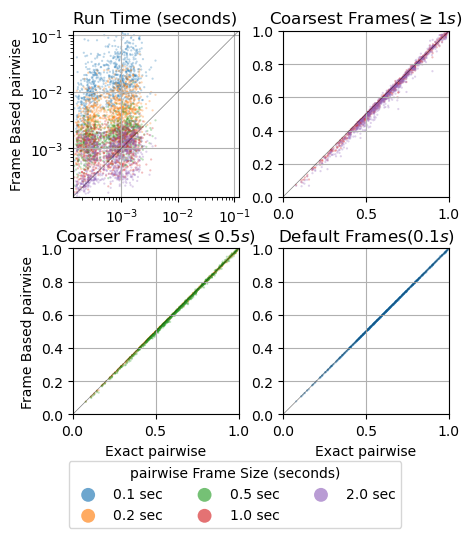

In [33]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from bnl import viz

# Load the data array from the NetCDF file
# results = xr.open_dataarray('./compare_implementation.nc')
# results = xr.open_dataarray('./new_compare.nc')
results = xr.open_dataarray('./new_faster_compare.nc')
metric='pairwise'

fig, axes = plt.subplots(2, 2, figsize=(4.5,4.5), constrained_layout=True)
if not isinstance(axes, np.ndarray):
    axes = np.array([axes])
else:
    axes = axes.ravel()

viz.plot_scatter_frame_vs_continuous(
    results, sel_dict=dict(output='run_time', metric=metric), ax=axes[0], log_scale=True
)
axes[0].set_title('Run Time (seconds)')

viz.plot_scatter_frame_vs_continuous(
    results, sel_dict=dict(output='f', metric=metric), frame_sizes=[1,2], ax=axes[1], color_start_idx=3
)
axes[1].set_title('Coarsest Frames($\geq 1s$)')

viz.plot_scatter_frame_vs_continuous(
    results, sel_dict=dict(output='f', metric=metric), frame_sizes=[0.2, 0.5], ax=axes[2], color_start_idx=1
)
axes[2].set_title('Coarser Frames($\leq 0.5s$)')

viz.plot_scatter_frame_vs_continuous(
    results, sel_dict=dict(output='f', metric=metric), frame_sizes=[0.1], ax=axes[3], color_start_idx=0
)
axes[3].set_title('Default Frames($0.1s$)')

# Set the title for each subplot
# Create the legend for the middle subplot into a row of handle, and plot the thin bar under the how figure
axes[0].set_ylabel(f'Frame Based {metric}')
axes[2].set_ylabel(f'Frame Based {metric}')
axes[2].set_xlabel(f'Exact {metric}')
axes[3].set_xlabel(f'Exact {metric}')

# Plot the legend with bigger handles
handles, labels = axes[0].get_legend_handles_labels()
for h in handles:
    h.set_sizes([100])  # Adjust the size as needed
    h.set_alpha(0.65)  # Set transparency for better visibility
leg = fig.legend(handles, labels, 
           loc='lower center', ncol=3, fontsize=10, bbox_to_anchor=(0.5,-0.17)
          )
leg.set_title(f'{metric} Frame Size (seconds)')

# Set all the handles in the plot back to the smaller size.
for ax in axes:
    handles, _ = ax.get_legend_handles_labels()
    for h in handles:
        # Set it back!
        h.set_sizes([2.5])  # Adjust the size as needed
        h.set_alpha(0.3)  # Set transparency for better visibility
    
# Show the plot
fig.set_constrained_layout_pads(w_pad=0, h_pad=0, hspace=0, wspace=0)
# fig.savefig('../../../text/hier_metric/figs/compare_implementation.pdf', transparent=True, bbox_inches='tight')
# fig.savefig(f'./compare_implementation_{metric}.pdf', transparent=True, bbox_inches='tight')


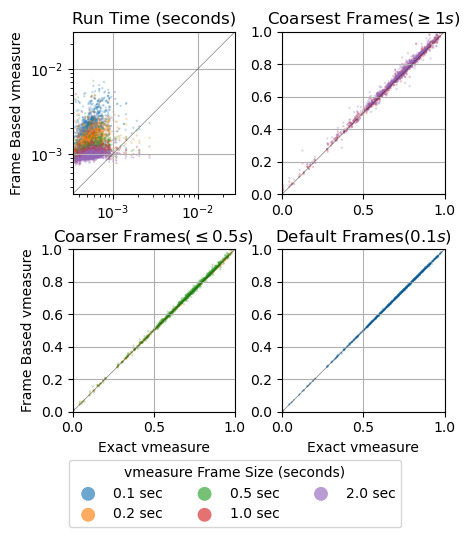

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from bnl import viz

# Load the data array from the NetCDF file
# results = xr.open_dataarray('./compare_implementation.nc')
# results = xr.open_dataarray('./new_compare.nc')
results = xr.open_dataarray('./new_faster_compare.nc')

fig, axes = plt.subplots(2, 2, figsize=(4.5,4.5), constrained_layout=True)
if not isinstance(axes, np.ndarray):
    axes = np.array([axes])
else:
    axes = axes.ravel()

metric='vmeasure'

viz.plot_scatter_frame_vs_continuous(
    results, sel_dict=dict(output='run_time', metric=metric), ax=axes[0], log_scale=True
)
axes[0].set_title('Run Time (seconds)')

viz.plot_scatter_frame_vs_continuous(
    results, sel_dict=dict(output='f', metric=metric), frame_sizes=[1,2], ax=axes[1], color_start_idx=3
)
axes[1].set_title('Coarsest Frames($\geq 1s$)')

viz.plot_scatter_frame_vs_continuous(
    results, sel_dict=dict(output='f', metric=metric), frame_sizes=[0.2, 0.5], ax=axes[2], color_start_idx=1
)
axes[2].set_title('Coarser Frames($\leq 0.5s$)')

viz.plot_scatter_frame_vs_continuous(
    results, sel_dict=dict(output='f', metric=metric), frame_sizes=[0.1], ax=axes[3], color_start_idx=0
)
axes[3].set_title('Default Frames($0.1s$)')

# Set the title for each subplot
# Create the legend for the middle subplot into a row of handle, and plot the thin bar under the how figure
axes[0].set_ylabel(f'Frame Based {metric}')
axes[2].set_ylabel(f'Frame Based {metric}')
axes[2].set_xlabel(f'Exact {metric}')
axes[3].set_xlabel(f'Exact {metric}')

# Plot the legend with bigger handles
handles, labels = axes[0].get_legend_handles_labels()
for h in handles:
    h.set_sizes([100])  # Adjust the size as needed
    h.set_alpha(0.65)  # Set transparency for better visibility
leg = fig.legend(handles, labels, 
           loc='lower center', ncol=3, fontsize=10, bbox_to_anchor=(0.5,-0.17)
          )
leg.set_title(f'{metric} Frame Size (seconds)')

# Set all the handles in the plot back to the smaller size.
for ax in axes:
    handles, _ = ax.get_legend_handles_labels()
    for h in handles:
        # Set it back!
        h.set_sizes([2.5])  # Adjust the size as needed
        h.set_alpha(0.3)  # Set transparency for better visibility
    
# Show the plot
fig.set_constrained_layout_pads(w_pad=0, h_pad=0, hspace=0, wspace=0)
# fig.savefig('../../../text/hier_metric/figs/compare_implementation.pdf', transparent=True, bbox_inches='tight')
fig.savefig(f'./compare_implementation_{metric}.pdf', transparent=True, bbox_inches='tight')


### New plots
Run speed on salami anno against each other

In [ ]:
import numpy as np
import xarray as xr
import seaborn as sns
import json

import matplotlib.pyplot as plt

def plot_runtime_vs_duration(results_path, metric, ax, dur_dict_path='salami_durations.json', q_Factor=10):
    """
    Plots the runtime vs duration for different frame sizes for a given metric.

    Args:
        results_path (str): Path to the xarray data array containing the results.
        metric (str): The metric to plot.
        ax (matplotlib.axes._axes.Axes): The axes to plot on.
        dur_dict_path (str): Path to the JSON file containing the duration dictionary.
    """
    results = xr.open_dataarray(results_path)
    with open(dur_dict_path, 'r') as f:
        dur_dict = json.load(f)

    def get_runtime_vs_duration(results, dur_dict, frame_size, metric):
        x = []
        y = []
        for tid in results['tid'].values:
            tid = str(tid)
            duration = np.round(dur_dict[tid] / q_Factor) * q_Factor
            runtime = results.sel(tid=tid, output='run_time', frame_size=frame_size, metric=metric).item()
            x.append(duration)
            y.append(runtime)
        return x, y
    

    frame_sizes = [0, 0.1, 0.2, 0.5, 1, 2]
    colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown']

    for frame_size, color in zip(frame_sizes, colors):
        x, y = get_runtime_vs_duration(results, dur_dict, frame_size, metric)
        # sns.scatterplot(x=x, y=y, label=f'Frame Size: {frame_size}', color=color, alpha=0.7, ax=ax, legend=False)
        sns.lineplot(x=x, y=y, label=f'{frame_size} sec', color=color, ax=ax, errorbar=('ci', 99.9), legend=False)

    ax.set_title(f'Runtime vs Duration for Different Frame Sizes ({metric})')
    ax.set_xlabel('Duration (seconds)')
    ax.set_yscale('log')
    # ax.grid(True, which="both", ls="--", alpha=0.5)

    

In [161]:

fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharex=True, sharey=True)  # Adjust figsize as needed

metrics = ['pairwise', 'vmeasure', 'lmeasure']

for i, metric in enumerate(metrics):
    plot_runtime_vs_duration('./new_faster_compare.nc', metric, ax=axes[i])
    axes[i].set_title(f'{metric}')
    axes[i].grid(True)
    # axes[i].sharey(axes[0])  # Share y-axis with the first subplot
    axes[i].set_ylim(1e-4, 100)

axes[0].set_ylabel('Runtime (seconds)')
axes[1].set_xlabel('Duration (seconds)')
axes[1].legend(title='Frame Size', fontsize=9, ncol=2)
axes[0].set_title('Pairwise')
axes[1].set_title('V-measure')
axes[2].set_title('L-measure')

plt.tight_layout()  # Adjust layout to prevent overlap
fig.savefig('./runtime_vs_duration.pdf', transparent=True, bbox_inches='tight')r



### Next plot:
accuracy


In [1]:
# Let's get the accurcay of our results by plotting the residual
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
results = xr.open_dataarray('./new_faster_compare.nc')
metrics_list = ['pairwise', 'vmeasure', 'lmeasure']

fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True, sharex=True)

for ax, metric in zip(axes, metrics_list):
    my_results = results.sel(output='f', metric=metric, frame_size=0)
    all_results = results.sel(output='f', metric=metric).drop_sel(frame_size=0)
    residual = all_results - my_results
    residual.name = 'Residual'
    
    residual_df = residual.to_dataframe().reset_index().drop(columns=['output', 'metric'])
    
    sns.boxplot(data=residual_df, x='Residual', y='frame_size', orient='h', fill=False, fliersize=0, ax=ax)
    sns.stripplot(data=residual_df, x='Residual', y='frame_size', color='maroon', alpha=0.1, jitter=0.1, size=2, ax=ax, orient='h')
    ax.axvline(0, zorder=-1, color='k', linewidth=2)
    ax.set_xscale('symlog', linthresh=0.001)
    ax.grid(True)
    ax.set_title(metric.capitalize())

axes[0].set(ylabel='Frame Size (seconds)', xlabel='')
axes[1].set(xlabel='Difference from Our Implementation', title='V-measure')
axes[2].set(xlabel='', title='L-measure')
plt.tight_layout()
plt.savefig('./frame_size_metrics_comparison.pdf', bbox_inches='tight')



In [ ]:
results.sel(output='run_time', metric='pairwise').plot(ax=axes[0, 0], color='black', linestyle='--', label='Run Time')

<xarray.DataArray (tid: 883, frame_size: 6, output: 4, metric: 3)> Size: 509kB
[63576 values with dtype=float64]
Coordinates:
  * tid         (tid) object 7kB '429' '18' '538' '478' ... '6' '99' '628' '768'
  * frame_size  (frame_size) float64 48B 0.0 0.1 0.2 0.5 1.0 2.0
  * output      (output) object 32B 'run_time' 'p' 'r' 'f'
  * metric      (metric) object 24B 'lmeasure' 'pairwise' 'vmeasure'

In [51]:
# collect all results into a single data array
# and save it to a file
import os
from glob import glob
all_result_paths = glob('./depth_sweep/*.nc')

# Let's get the results from the depth sweep:
das = []
for fp in all_result_paths:
    # Load the data array and assign the tid as a coordinate
    tid = os.path.basename(fp).split('.')[0]
    da = xr.open_dataarray(fp)
    # make sure da.tid is a string
    # Append the data array to the list
    das.append(xr.open_dataarray(fp))
# Concatenate all the data arrays along the 'tid' dimension
final_da = xr.concat(das, dim='tid')
final_da['tid'] = final_da['tid'].astype(str)
final_da.to_netcdf('./depth_sweep.nc')



In [52]:
# load the data array
da = xr.open_dataarray('./depth_sweep.nc')

da


<xarray.DataArray (level: 12, tid: 1359, version: 2, output: 4)> Size: 1MB
[130464 values with dtype=float64]
Coordinates:
  * tid      (tid) object 11kB '429' '18' '538' '478' ... '6' '99' '628' '768'
  * level    (level) int32 48B 0 1 2 3 4 5 6 7 8 9 10 11
  * output   (output) object 32B 'run_time' 'lp' 'lr' 'lf'
  * version  (version) object 16B 'mir_eval' 'my'

### Next plot:
Figure out what how many times adobe did this evaluation


In [39]:
da = xr.open_dataarray('./depth_sweep.nc')
my_result = da.sel(output='run_time', version='my')
my_result.name = 'my_run_time'
me_result = da.sel(output='run_time', version='mir_eval')
me_result.name = 'mir_eval_run_time'

In [40]:
my_runtime_df = my_result.to_dataframe().reset_index()
me_runtime_df = me_result.to_dataframe().reset_index()

In [41]:
runtime_da = da.sel(output='run_time')

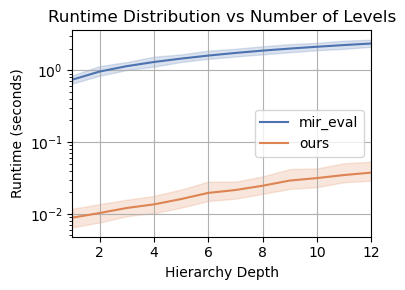

In [57]:
# Convert runtime_da to DataFrame
df = runtime_da.to_dataframe(name='run_time').reset_index()
# Offset levels by 1
df['level'] += 1

plt.figure(figsize=(4, 3))

ax = sns.lineplot(
    x='level', y='run_time', hue='version',
    data=df, markers='o', dashes=False, errorbar=('ci', 99.9),
    palette='deep'
)

plt.yscale('log')
plt.xlabel('Hierarchy Depth')
plt.ylabel('Runtime (seconds)')
plt.title('Runtime Distribution vs Number of Levels')
plt.grid(True)
plt.xlim(1,12)

# Modify legend text to "mir_eval" and "ours"
handles, labels = ax.get_legend_handles_labels()
new_labels = ['mir_eval' if label == 'mir_eval' else 'ours' for label in labels]
plt.legend(handles, new_labels)
plt.tight_layout()
plt.savefig('./depth_sweep_runtime.pdf', bbox_inches='tight', transparent=True)




### Next plot:
speed sweeping levels


In [58]:
results = xr.open_dataarray('./new_faster_compare.nc')
def plot_residuals(results, metric, axes, legend=False):
    """
    Computes the residual between the frame‐based f measure (for frame_size=0) and the f measure for other frame sizes,
    and plots a KDE and a box plot on the provided axes.
    Args:
        results (xarray.DataArray): DataArray with coordinates 'tid', 'frame_size', 'output', and 'metric'.
        metric (str): The metric to plot (e.g., 'pairwise').
        axes (list): List of two matplotlib axes [ax_kde, ax_box] where the plots will be drawn.
    """
    # Get the frameless results (exact measure)
    my_results = results.sel(output='f', metric=metric, frame_size=0)
    # Get results with all frame sizes except 0 and compute residual with the exact measure
    all_results = results.sel(output='f', metric=metric).drop_sel(frame_size=0)
    residual = all_results - my_results
    residual.name = 'Residual'
    # Convert to a pandas DataFrame for plotting
    residual_df = residual.to_dataframe().reset_index().drop(columns=['output', 'metric'])
    # Slice the DataFrame to only include the first 3 frame sizes (assumes ascending order)
    first_three = sorted(residual_df['frame_size'].unique())[:3]
    last_three = sorted(residual_df['frame_size'].unique())[-3:]
    residual_df_fine = residual_df[residual_df['frame_size'].isin(first_three)]
    # Plot violin plot of residuals grouped by frame size on the first axis
    sns.violinplot(data=residual_df_fine, y='frame_size', x='Residual', ax=axes[0], orient='h', inner="point")
    axes[0].set_title(f'{metric} residuals')
    residual_df_coarse = residual_df[residual_df['frame_size'].isin(last_three)]
    sns.violinplot(data=residual_df_coarse, y='frame_size', x='Residual', ax=axes[1], orient='h', inner="point")
    # Calculate symmetrical limits for x-axis based on the maximum absolute residual value
    # x_abs_max = abs(residual_df_coarse['Residual']).max()
    lim_coarse = -0.04
    x_abs_max = abs(residual_df_fine['Residual']).max()
    lim_fine = x_abs_max + 0.001  # small margin
    # Set vertical line at 0 and symmetrical x-axis limits for both axes
    for ax, lim in zip(axes, [0.03, 0.1]):
        ax.axvline(0, color='black', linestyle='--')
        ax.set_xlim(-lim, lim)
fig, axes = plt.subplots(2, 3, figsize=(8, 5), constrained_layout=True, sharey='row')
plot_residuals(results, 'pairwise', axes[:, 0])
plot_residuals(results, 'vmeasure', axes[:, 1])
plot_residuals(results, 'lmeasure', axes[:, 2])

### Next plot:
2 flat level and their meets, then intersection


In [192]:
import bnl, mir_eval, random
hiers = bnl.fio.salami_ref_hiers(384)

In [194]:
hiers = []
while len(hiers) < 2:
    rand_id = random.choice(bnl.fio.salami_tids())
    hiers = list(bnl.fio.salami_ref_hiers(rand_id).values())

print(rand_id)


1071


In [ ]:
hiers = list(bnl.fio.salami_ref_hiers(464).values())

806


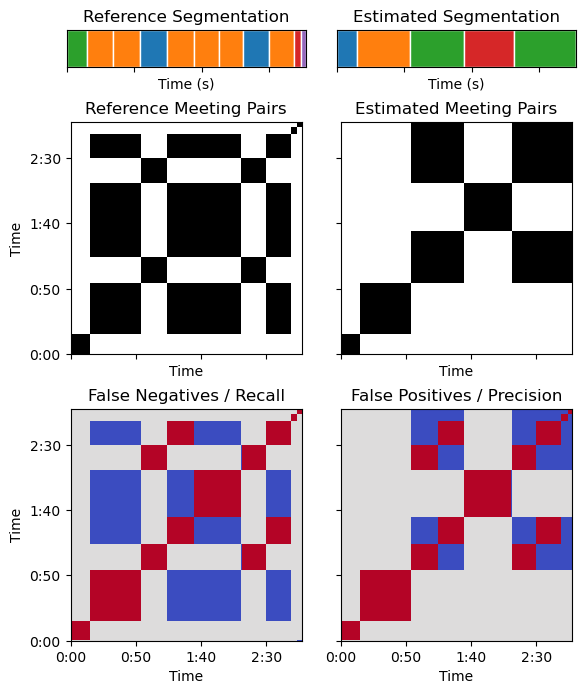

In [247]:
# hiers = []
# while len(hiers) < 2:
#     rand_id = random.choice(bnl.fio.salami_tids())
#     hiers = list(bnl.fio.salami_ref_hiers(rand_id).values())


hiers = list(bnl.fio.salami_ref_hiers(464).values())
print(rand_id)

a = hiers[0].levels[0]
b = hiers[1].levels[0]

## Create a plot of 3 rows and 2 columns
fig, axes = plt.subplots(
    3, 2, figsize=(6, 7),
    gridspec_kw={'height_ratios': [0.8, 5, 5]}, sharey='row', sharex='col')

a.plot(ax=axes[0, 0], text=False)
b.plot(ax=axes[0, 1], text=False)
bnl.viz.sq(a.A(), a.beta, ax=axes[1, 0], cmap='gray_r')
bnl.viz.sq(b.A(), b.beta, ax=axes[1, 1], cmap='gray_r')

ci, al, bl = bnl.mtr.make_common_itvls([a.itvls], [a.labels], [b.itvls], [b.labels])
common_bs = mir_eval.util.intervals_to_boundaries(ci)
intersection = bnl.mtr._meet(al) * bnl.mtr._meet(bl)


false_positives = bnl.mtr._meet(bl) - intersection
false_negatives = bnl.mtr._meet(al) - intersection
# bnl.viz.sq(intersection, common_bs, ax=axes[2, 0])
bnl.viz.sq(-false_negatives.astype(int) + intersection.astype(int), common_bs, ax=axes[2, 0])
bnl.viz.sq(-false_positives.astype(int) + intersection.astype(int), common_bs, ax=axes[2, 1])

axes[0, 0].set(title='Reference Segmentation')
axes[0, 1].set(title='Estimated Segmentation')
axes[1, 0].set(title='Reference Meeting Pairs')
axes[1, 1].set(title='Estimated Meeting Pairs', ylabel=None)
axes[2, 0].set(title='False Negatives / Recall')
axes[2, 1].set(title='False Positives / Precision', ylabel=None)

fig.tight_layout()
fig.savefig('./explain_pfc.pdf', bbox_inches='tight', transparent=True)


In [214]:
len(common_bs)

13

In [205]:
al

[array(['Silence', 'N', 'N', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B',
        'Silence'], dtype='<U7')]

In [199]:
len(ci)

12

In [124]:
a.A()
a.beta
bnl.viz.sq(a.A(), a.beta)

(<Figure size 686.409x50 with 1 Axes>, <Axes: xlabel='Time (s)'>)

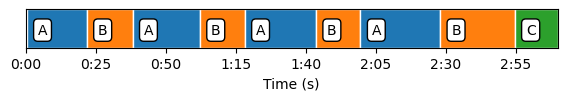

In [68]:
a.plot()

(<Figure size 1090.13x50 with 1 Axes>, <Axes: xlabel='Time (s)'>)

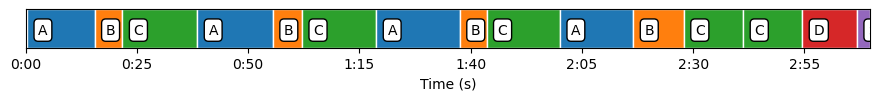

In [69]:
b.plot()

## Let's do frame size sensitivity

In [ ]:
# Get a list of frame size, and plot their v-measure, pfc, and l-measure.
import numpy as np
import mir_eval, bnl
import pandas as pd
tid = '776'
salami_hiers = bnl.fio.salami_ref_hiers(tid='776')
adobe_hier = bnl.fio.adobe_hiers(tid='776')
test_fs = np.arange(0.03, 2.01, 0.02)


h1, h2 = salami_hiers
h1, adobe_hier = bnl.mtr.align_hier(h1, adobe_hier)


In [6]:
bnl.fmtr.lmeasure(adobe_hier.itvls, adobe_hier.labels, h1.itvls, h1.labels frame_size=fs)

(0.4758339360180916, 0.37821424882353394, 0.4214450141573712)

In [ ]:
df = pd.DataFrame(results, columns=['frame_size', 'vmeasure', 'pairwise', 'lmeasure'])
df.to_csv(f'./fs_sensitivity.csv', index=False)

In [10]:
# Doing on est and anno
results = []
for fs in test_fs:
    print(fs)
    # compute the metrics and save result
    _, _, v = mir_eval.segment.vmeasure(h1.itvls[-1], h1.labels[-1], adobe_hier.itvls[-1], adobe_hier.labels[-1], frame_size=fs)
    _, _, p = mir_eval.segment.pairwise(h1.itvls[-1], h1.labels[-1], adobe_hier.itvls[-1], adobe_hier.labels[-1], frame_size=fs)
    _, _, l = mir_eval.hierarchy.lmeasure(h1.itvls, h1.labels, adobe_hier.itvls, adobe_hier.labels, frame_size=fs)
    results.append([fs, v, p, l])

results = np.array(results)
df = pd.DataFrame(results, columns=['frame_size', 'vmeasure', 'pairwise', 'lmeasure'])
df.to_csv(f'./fs_sensitivity_adobe_776.csv', index=False)
results = results.T

0.02
0.04
0.06
0.08
0.1
0.12000000000000001
0.13999999999999999
0.16
0.18
0.19999999999999998
0.22
0.24
0.26
0.28
0.30000000000000004
0.32
0.34
0.36000000000000004
0.38
0.4
0.42000000000000004
0.44
0.46
0.48000000000000004
0.5
0.52
0.54
0.56
0.5800000000000001
0.6
0.62
0.64
0.66
0.68
0.7000000000000001
0.7200000000000001
0.74
0.76
0.78
0.8
0.8200000000000001
0.8400000000000001
0.86
0.88
0.9
0.92
0.9400000000000001
0.9600000000000001
0.98
1.0
1.02
1.04
1.06
1.08
1.1
1.12
1.1400000000000001
1.1600000000000001
1.18
1.2
1.22
1.24
1.26
1.28
1.3
1.32
1.34
1.36
1.3800000000000001
1.4000000000000001
1.4200000000000002
1.44
1.46
1.48
1.5
1.52
1.54
1.56
1.58
1.6
1.62
1.6400000000000001
1.6600000000000001
1.6800000000000002
1.7
1.72
1.74
1.76
1.78
1.8
1.82
1.84
1.86
1.8800000000000001
1.9000000000000001
1.9200000000000002
1.94
1.96
1.98
2.0


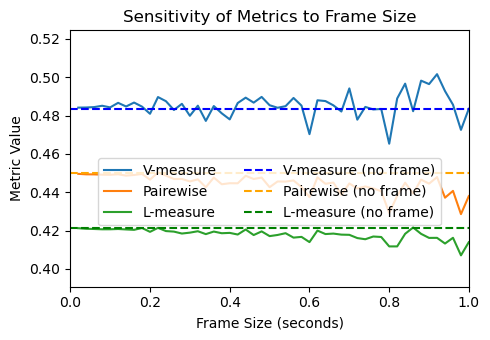

In [16]:
# Get the frameless results too
_, _, my_v = bnl.fmtr.vmeasure(h1.itvls[-1], h1.labels[-1], adobe_hier.itvls[-1], adobe_hier.labels[-1])
_, _, my_p = bnl.fmtr.pairwise(h1.itvls[-1], h1.labels[-1], adobe_hier.itvls[-1], adobe_hier.labels[-1])
_, _, my_l = bnl.fmtr.lmeasure(h1.itvls, h1.labels, adobe_hier.itvls, adobe_hier.labels)

import matplotlib.pyplot as plt
# results = results.T
plt.figure(figsize=(5, 3.5))
plt.plot(results[0], results[1], label='V-measure')
plt.plot(results[0], results[2], label='Pairewise')
plt.plot(results[0], results[3], label='L-measure')

# plot the frameless results as hlines from 0 to 1
plt.axhline(my_v, color='blue', linestyle='--', label='V-measure (no frame)')
plt.axhline(my_p, color='orange', linestyle='--', label='Pairewise (no frame)')
plt.axhline(my_l, color='green', linestyle='--', label='L-measure (no frame)')
plt.xlabel('Frame Size (seconds)')
plt.ylabel('Metric Value')
plt.title('Sensitivity of Metrics to Frame Size')
plt.legend(ncol=2, loc='center', bbox_to_anchor=(0.5, 0.37))
plt.xlim(0,1)
# plt.ylim(0.455, 0.565)
plt.tight_layout()
plt.savefig(f'./fs_sensitivity_adobe.pdf', transparent=True, bbox_inches='tight')

In [ ]:
# Doing on two annotations
results = []
for fs in test_fs:
    # compute the metrics and save result
    _, _, v = mir_eval.segment.vmeasure(h1.itvls[1], h1.labels[1], h2.itvls[1], h2.labels[1], frame_size=fs)
    _, _, p = mir_eval.segment.pairwise(h1.itvls[1], h1.labels[1], h2.itvls[1], h2.labels[1], frame_size=fs)
    _, _, l = mir_eval.hierarchy.lmeasure(h1.itvls, h1.labels, h2.itvls, h2.labels, frame_size=fs)
    results.append([fs, v, p, l])

results = np.array(results).T

In [45]:
# Save the result!
import pandas as pd
# results is a (4, 100) array, where rows are frame_size, vmeasure, pairwise, lmeasure
# We need to transpose it to get (100, 4) for the DataFrame
df = pd.DataFrame(results.T, columns=['frame_size', 'vmeasure', 'pairwise', 'lmeasure'])
df.to_csv(f'./fs_sensitivity.csv', index=False)

In [17]:
o = pd.read_csv(f'./fs_sensitivity.csv')
o

frame_size  vmeasure  pairwise  lmeasure
0         0.02  0.537716  0.527019  0.467646
1         0.04  0.538196  0.527106  0.467727
2         0.06  0.537947  0.526762  0.466787
3         0.08  0.539330  0.527297  0.467814
4         0.10  0.533888  0.525532  0.467088
..         ...       ...       ...       ...
95        1.92  0.537807  0.515266  0.456873
96        1.94  0.563510  0.517994  0.458106
97        1.96  0.568477  0.526316  0.470278
98        1.98  0.567015  0.525930  0.464258
99        2.00  0.572042  0.531063  0.470946

[100 rows x 4 columns]

In [20]:
# Get the frameless results too
_, _, my_v = bnl.fmtr.vmeasure(h1.itvls[1], h1.labels[1], h2.itvls[1], h2.labels[1])
_, _, my_p = bnl.fmtr.pairwise(h1.itvls[1], h1.labels[1], h2.itvls[1], h2.labels[1])
_, _, my_l = bnl.fmtr.lmeasure(h1.itvls, h1.labels, h2.itvls, h2.labels)

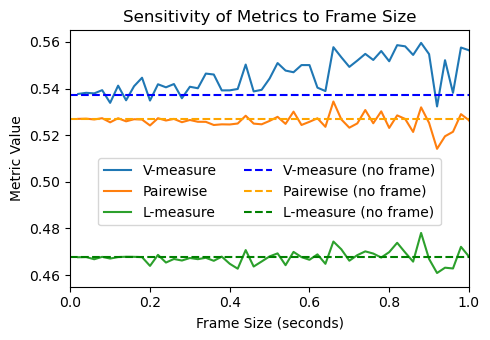

In [25]:
import matplotlib.pyplot as plt
results = o.to_numpy().T
plt.figure(figsize=(5, 3.5))
plt.plot(results[0], results[1], label='V-measure')
plt.plot(results[0], results[2], label='Pairewise')
plt.plot(results[0], results[3], label='L-measure')

# plot the frameless results as hlines from 0 to 1
plt.axhline(my_v, color='blue', linestyle='--', label='V-measure (no frame)')
plt.axhline(my_p, color='orange', linestyle='--', label='Pairewise (no frame)')
plt.axhline(my_l, color='green', linestyle='--', label='L-measure (no frame)')
plt.xlabel('Frame Size (seconds)')
plt.ylabel('Metric Value')
plt.title('Sensitivity of Metrics to Frame Size')
plt.legend(ncol=2, loc='center', bbox_to_anchor=(0.5, 0.37))
plt.xlim(0,1)
plt.ylim(0.455, 0.565)
plt.tight_layout()
plt.savefig(f'./fs_sensitivity_anno.pdf', transparent=True, bbox_inches='tight')

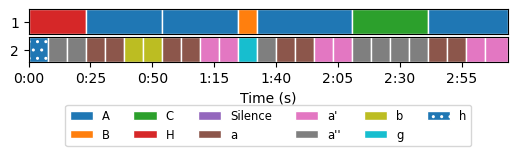

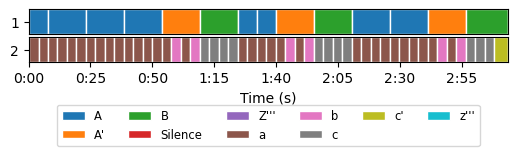

In [50]:
fig, axs = h1.plot(text=False, legend=6, legend_offset=1.5)
fig.savefig(f'./h1.pdf', transparent=True, bbox_inches='tight')
fig, axs = h2.plot(text=False, legend=6, legend_offset=1.5)
fig.savefig(f'./h2.pdf', transparent=True, bbox_inches='tight')

## What's up with the rho being zero in some segment business? Is that even possible?

Let's look at the code where this can be detected

In [2]:
tids = bnl.fio.salami_tids()


for tid in tids:
    salami_hiers = bnl.fio.salami_ref_hiers(tid=tid)
    if len(salami_hiers) < 2:
        continue
    h1, h2 = salami_hiers

    # try l-measure to see if the run time error surfaces
    try:
        _, _, l = bnl.fmtr.lmeasure(h1.itvls, h1.labels, h2.itvls, h2.labels)
    except Exception as e:
        print(f"Error for tid {tid}: {e}")
        continue

Error for tid 341: There are segments that are not meeting any other segments, please check your input.


In [1]:
import bnl
h1, h2 = bnl.fio.salami_ref_hiers(tid='341')

In [2]:
bnl.fmtr.lmeasure(h1.itvls, h1.labels, h2.itvls, h2.labels)

(0.0, 0.0, 0.0)

In [3]:
import mir_eval
mir_eval.hierarchy.lmeasure(h1.itvls, h1.labels, h2.itvls, h2.labels)

(0.0, 0.0, 0.0)

(<Figure size 500x130 with 2 Axes>,
 array([<Axes: >, <Axes: xlabel='Time (s)'>], dtype=object))

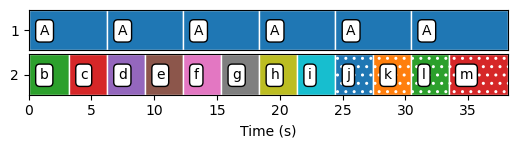

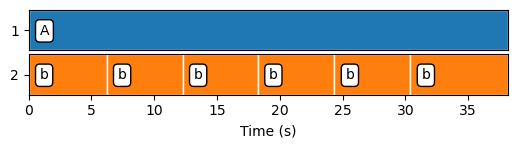

In [5]:
h1.plot();
h2.plot()

## Hierarchical Depth!

Let's get a track from adobe and compare

In [78]:
import bnl, random
from bnl import viz, fio
tids = fio.salami_tids()
random_tid = random.choice(tids)
salami_annos = fio.salami_ref_hiers(tid=random_tid)
salami_adobe = fio.adobe_hiers(tid=random_tid)

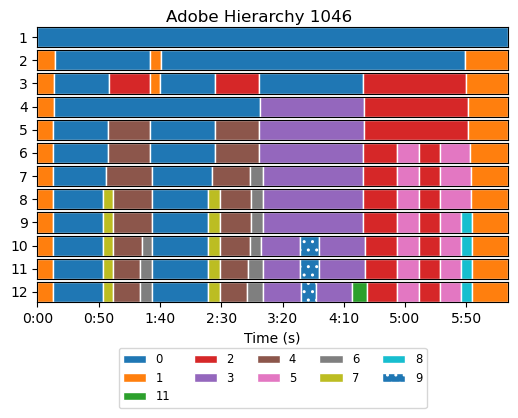

In [79]:
fig, axs = salami_adobe.plot(legend=5, text=False, legend_offset=2, figsize=(5,4.));
fig.suptitle(f'Adobe Hierarchy {random_tid}');

In [97]:
from tqdm import tqdm
import time
import os
import xarray as xr
import numpy as np
import mir_eval
import bnl


def time_depth_sweep(tid, frame_size=0.2, cache_dir='./depth_sweep', retime=False):

    # Check if already timed
    os.makedirs(cache_dir, exist_ok=True)
    output_filepath = os.path.join(cache_dir, f'{tid}.nc')
    if os.path.exists(output_filepath) and not retime:
        print(f"Already timed {tid}.")
        return xr.load_dataarray(output_filepath)

    adobe_hier = bnl.fio.adobe_hiers(tid=str(tid))
    salami_hier = bnl.fio.salami_ref_hiers(tid=str(tid))[0]
    ref, est = bnl.mtr.align_hier(salami_hier, adobe_hier)
     # Save the results to xarray
    result_da = xr.DataArray(
        dims=['level', 'tid', 'version', 'output'],
        coords={'level': range(est.d), 'tid': [tid], 'version': ['mir_eval', 'my'], 'output': ['run_time', 'lp', 'lr', 'lf']},
    )

    for d in range(est.d):
        start_time = time.time()
        mylp, mylr, mylm = bnl.fmtr.lmeasure(ref.itvls, ref.labels, est.itvls[:d+1], est.labels[:d+1])
        my_run_time = time.time() - start_time
        result_da.loc[dict(level=d, tid=tid, version='my')] = [my_run_time, mylp, mylr, mylm]
        
        start_time = time.time()
        melp, melr, melm = mir_eval.hierarchy.lmeasure(ref.itvls, ref.labels, est.itvls[:d+1], est.labels[:d+1], frame_size=frame_size)
        me_run_time = time.time() - start_time
        result_da.loc[dict(level=d, tid=tid, version='mir_eval')] = [me_run_time, melp, melr, melm]

    # Save the results to a NetCDF file
    result_da.to_netcdf(output_filepath)
    print(f"Timed {tid} and saved to {output_filepath}.")
    return result_da

In [98]:
time_depth_sweep(776)

Timed 776 and saved to ./depth_sweep/776.nc.


<xarray.DataArray (level: 12, tid: 1, version: 2, output: 4)> Size: 768B
array([[[[3.42381239e-01, 0.00000000e+00, 0.00000000e+00,
          0.00000000e+00],
         [1.50418282e-03, 1.93624069e-01, 1.60252169e-04,
          3.20239292e-04]]],


       [[[4.00398731e-01, 5.95915678e-01, 9.44113073e-02,
          1.62998635e-01],
         [1.53207779e-03, 5.94892348e-01, 9.80321599e-02,
          1.68325932e-01]]],


       [[[5.23684263e-01, 3.56278415e-01, 2.91938070e-01,
          3.20915112e-01],
         [1.74784660e-03, 3.57974224e-01, 2.94728328e-01,
          3.23287060e-01]]],


       [[[5.45862913e-01, 3.86389627e-01, 4.04053147e-01,
          3.95024029e-01],
...
         [2.89297104e-03, 4.00189031e-01, 4.51935598e-01,
          4.24491120e-01]]],


       [[[8.82056952e-01, 3.81984312e-01, 4.78468388e-01,
          4.24816885e-01],
         [3.25131416e-03, 3.83657910e-01, 4.80855929e-01,
          4.26792892e-01]]],


       [[[8.69389057e-01, 3.67126990e-01, 4.50610134e-01,
          4.04607147e-01],
         [3.88789177e-03, 3.68939863e-01, 4.53368618e-01,
          4.06819971e-01]]],


       [[[9.20445919e-01, 3.76444222e-01, 4.73235286e-01,
          4.19326787e-01],
         [3.83305550e-03, 3.78165136e-01, 4.75732518e-01,
          4.21374743e-01]]]])
Coordinates:
  * level    (level) int64 96B 0 1 2 3 4 5 6 7 8 9 10 11
  * tid      (tid) int64 8B 776
  * version  (version) <U8 64B 'mir_eval' 'my'
  * output   (output) <U8 128B 'run_time' 'lp' 'lr' 'lf'

In [100]:
from pqdm.processes import pqdm
from bnl import prf

In [102]:
pqdm(tids, prf.time_depth_sweep, n_jobs=8)


QUEUEING TASKS | :   0%|          | 0/1359 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1359 [00:00<?, ?it/s]

Timed 100 and saved to ./depth_sweep/100.nc.
Timed 1005 and saved to ./depth_sweep/1005.nc.
Timed 1006 and saved to ./depth_sweep/1006.nc.
Timed 101 and saved to ./depth_sweep/101.nc.
Timed 1007 and saved to ./depth_sweep/1007.nc.
Timed 1004 and saved to ./depth_sweep/1004.nc.
Timed 1003 and saved to ./depth_sweep/1003.nc.
Timed 10 and saved to ./depth_sweep/10.nc.
Timed 1010 and saved to ./depth_sweep/1010.nc.
Timed 1000 and saved to ./depth_sweep/1000.nc.
Timed 1012 and saved to ./depth_sweep/1012.nc.
Timed 1015 and saved to ./depth_sweep/1015.nc.
Timed 1002 and saved to ./depth_sweep/1002.nc.
Timed 1008 and saved to ./depth_sweep/1008.nc.
Timed 1011 and saved to ./depth_sweep/1011.nc.
Timed 1014 and saved to ./depth_sweep/1014.nc.
Timed 1020 and saved to ./depth_sweep/1020.nc.
Timed 1019 and saved to ./depth_sweep/1019.nc.
Timed 1018 and saved to ./depth_sweep/1018.nc.
Timed 1022 and saved to ./depth_sweep/1022.nc.
Timed 1016 and saved to ./depth_sweep/1016.nc.
Timed 1013 and saved 

COLLECTING RESULTS | :   0%|          | 0/1359 [00:00<?, ?it/s]

[<xarray.DataArray (level: 12, tid: 1, version: 2, output: 4)> Size: 768B
 array([[[[7.23854065e-01, 0.00000000e+00, 0.00000000e+00,
           0.00000000e+00],
          [1.25598907e-03, 2.92017597e-01, 1.52608846e-04,
           3.05058269e-04]]],
 
 
        [[[1.04781270e+00, 4.46354527e-01, 1.53168100e-01,
           2.28072375e-01],
          [1.45697594e-03, 4.46271387e-01, 1.53918795e-01,
           2.28892628e-01]]],
 
 
        [[[1.14242697e+00, 4.38644168e-01, 1.89867798e-01,
           2.65020896e-01],
          [2.02798843e-03, 4.38665471e-01, 1.89984065e-01,
           2.65138028e-01]]],
 
 
        [[[1.30064702e+00, 4.58745374e-01, 4.70582596e-01,
           4.64588597e-01],
 ...
          [4.70089912e-03, 4.72604828e-01, 5.30369976e-01,
           4.99823945e-01]]],
 
 
        [[[2.08487320e+00, 4.72211602e-01, 5.29430433e-01,
           4.99186704e-01],
          [5.62691689e-03, 4.72714972e-01, 5.29448757e-01,
           4.99475978e-01]]],
 
 
        [[[2.23491096

In [84]:
np.asarray(me_lms) - np.asarray(my_lms)

array([[-0.00066922, -0.00082461, -0.00103225],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854],
       [-0.00080299, -0.00084525, -0.00103854]])

In [85]:
np.asarray(my_lms)

array([[0.92389318, 0.28986803, 0.44128465],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469],
       [0.89608629, 0.31098186, 0.46172469]])

In [28]:
hr.plot()

(<Figure size 500x290 with 6 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: xlabel='Time (s)'>], dtype=object))

In [27]:
print(salami_annos[1].T, salami_adobe.T)
hr, he = bnl.mtr.align_hier(salami_annos[0], salami_adobe)
hr = hr.expand()
bnl.mtr.lmeasure(hr, he)

374.6548 374.622


(0.6828832549347276, 0.9538798144432352, 0.7959472750702824)

In [38]:
# Let's get rid of levels and see what happenes


for new_levels in [list(range(x)) for x in range(1, 13)]:
    new_he = bnl.levels2H([he.levels[l] for l in new_levels])
    print(new_levels)
    print(bnl.mtr.lmeasure(hr, new_he))

[0]
(0.34266027780591196, 0.00012623571890510581, 0.0002523784618260422)
[0, 1]
(0.6581936658011615, 0.6795731463818321, 0.6687125683245045)
[0, 1, 2]
(0.6926545525963147, 0.8361129926114956, 0.757652754511553)
[0, 1, 2, 3]
(0.6956489005800305, 0.8792069026274381, 0.77673056028302)
[0, 1, 2, 3, 4]
(0.7054514469663883, 0.9395109533962077, 0.8058291926527081)
[0, 1, 2, 3, 4, 5]
(0.7056384890536834, 0.9415027442302306, 0.8066831920101684)
[0, 1, 2, 3, 4, 5, 6]
(0.6956571429995844, 0.9480288015586521, 0.8024683909441865)
[0, 1, 2, 3, 4, 5, 6, 7]
(0.6850420359263201, 0.9501075221191366, 0.7960905937918014)
[0, 1, 2, 3, 4, 5, 6, 7, 8]
(0.6850744418311399, 0.9508836085628813, 0.7963847938835593)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
(0.6853581535152334, 0.9529612492576849, 0.7973045561901873)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
(0.6846689158186323, 0.9513795015694538, 0.7962844680495973)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
(0.6828832549347276, 0.9538798144432352, 0.7959472750702824)


In [34]:
for x in range(1, len(he.levels) + 1):
    new_levels = list(range(len(he.levels) - x, len(he.levels)))
    # new_levels.reverse()
    new_he = bnl.levels2H([he.levels[l] for l in new_levels])
    print(new_levels)
    print(bnl.mtr.lmeasure(hr, new_he))

[11]
(0.9027779385764622, 0.6228473124352261, 0.7371309728851035)
[10, 11]
(0.8973244392359175, 0.6643869165574928, 0.7634837450903399)
[9, 10, 11]
(0.9000255480312855, 0.6764759985517441, 0.7724009946532311)
[8, 9, 10, 11]
(0.9015321610560229, 0.6851291347050184, 0.7785731599595048)
[7, 8, 9, 10, 11]
(0.8956583777505992, 0.6863716687835092, 0.7771717569377471)
[6, 7, 8, 9, 10, 11]
(0.8989093119210908, 0.7335540979020062, 0.8078571384009704)
[5, 6, 7, 8, 9, 10, 11]
(0.9085913915774447, 0.8676583149135777, 0.8876532087579576)
[4, 5, 6, 7, 8, 9, 10, 11]
(0.9088797688137802, 0.8709141231418888, 0.889492014188317)
[3, 4, 5, 6, 7, 8, 9, 10, 11]
(0.8173827484454703, 0.8814992183617402, 0.8482310930772485)
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
(0.8162596175563637, 0.9537984857846489, 0.8796854586444323)
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
(0.6829752857248348, 0.9538795555721674, 0.796009695640166)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
(0.6828832549347276, 0.9538798144432352, 0.7959472750702824)


In [36]:
hr.relabel().plot()

(<Figure size 500x290 with 6 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: xlabel='Time (s)'>], dtype=object))

In [20]:
bnl.mtr.lmeasure(hr, new_he)

(0.8586787690885265, 0.627727157434456, 0.7252608096499328)

In [13]:
from bnl import metrics, fio
bad_id='1010'
salami_annos = fio.salami_ref_hiers(tid=bad_id)
salami_adobe = fio.adobe_hiers(tid=bad_id)


In [14]:
ref= salami_annos[1]
est= salami_annos[0]
print(metrics.time_lmeasure(ref, est, frame_size=0))
print(metrics.time_lmeasure(ref, est, frame_size=0.5))
print(metrics.time_lmeasure(ref, est, frame_size=0.2))
print(metrics.time_lmeasure(ref, est, frame_size=0.1))

(0.15095305442810059, (0.7366836355959089, 0.736543345875254, 0.7366134840559572))
(0.2579917907714844, (0.7600089438142289, 0.8376851003977025, 0.7969588053590114))
(0.7335591316223145, (0.7558285058507821, 0.834840011231004, 0.7933719332935493))
(1.8798332214355469, (0.7541893548256449, 0.832430667153229, 0.7913808462020459))


In [ ]:
salami_annos[1].labels, salami_annos[0].itvls

In [ ]:
hierarchy.lmeasure(salami_annos[1].itvls, salami_annos[1].labels, salami_annos[0].itvls, salami_annos[0].labels)

In [ ]:
import mir_eval
from mir_eval import hierarchy
hierarchy.lmeasure(salami_annos[1].itvls, salami_annos[1].labels, salami_adobe.itvls, salami_adobe.labels, frame_size=0.1)

In [ ]:
salami_adobe.plot()

In [ ]:
salami_annos[0].T

## Let's investigate!

- Transitivity, and effects of depth.
- Window and its effects. (It's faster now so we probably don't need it. Let's check the original claim that over all frames are redundant)
    - We can visualize this by looking at how window size affect the per time measures iota alpha and rho.
- Monotonicity Meet and its effect.
    - Again look at per time measures and how they change before and after.



In [ ]:
tids = bnl.fio.salami_tids()
hiers = bnl.fio.salami_ref_hiers(tid=tids[0])
hiers

In [ ]:
hiers[0].plot(text=False)